In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 50)

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Selected dataset
## Binary Prediction of Smoker Status using Bio-Signals
## https://www.kaggle.com/competitions/playground-series-s3e24/overview


I chose a dataset on smokers from the "2023 Kaggle Tabular Playground Series". The publicly available portion of the dataset contains medical information on 159256 people, 43% of whom are cigarette smokers. 


Why did I choose this dataset? - This dataset contains a large number of rows and all columns are interpretable, since this dataset participated in a real competition on kaggle, the maximum possible metrics for different types of models are already known from it

| Column               | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **id**               | Unique identifier                                          |
| **age**              | Age of the person (in years).                                              |
| **height(cm)**       | Height of the person in centimeters.                                       |
| **weight(kg)**       | Weight of the person in kilograms.                                         |
| **waist(cm)**        | Waist circumference in centimeters.                                        |
| **eyesight(left)**   | Visual acuity of the left eye.                                             |
| **eyesight(right)**  | Visual acuity of the right eye.                                            |
| **hearing(left)**    | Hearing ability of the left ear (1 — normal, 2 — impaired).                |
| **hearing(right)**   | Hearing ability of the right ear (1 — normal, 2 — impaired).               |
| **systolic**         | Systolic blood pressure (upper value).                                     |
| **relaxation**       | Diastolic blood pressure (lower value).                                    |
| **fasting blood sugar** | Fasting blood sugar level (in mg/dL).                                     |
| **Cholesterol**      | Cholesterol level in blood (in mg/dL).                                     |
| **triglyceride**     | Triglyceride level in blood (in mg/dL).                                    |
| **HDL**              | High-density lipoprotein (HDL) cholesterol level in blood (in mg/dL).     |
| **LDL**              | Low-density lipoprotein (LDL) cholesterol level in blood (in mg/dL).      |
| **hemoglobin**       | Hemoglobin level in blood (in g/dL).                                       |
| **Urine protein**    | Proteinuria in urine (0 — absent, 1 — present).                            |
| **serum creatinine** | Serum creatinine level (in mg/dL).                                         |
| **AST**              | Aspartate aminotransferase (AST) level in blood (in IU/L).                |
| **ALT**              | Alanine aminotransferase (ALT) level in blood (in IU/L).                  |
| **Gtp**              | Gamma-glutamyl transferase (GTP) level in blood (in IU/L).                |
| **dental caries**    | Presence of dental caries (0 — absent, 1 — present).                      |
| **smoking**          | Smoking status (0 — non-smoker, 1 — smoker).                              |


In [3]:
df = pd.read_csv('data/train.csv')
print(df.shape)
df.head()

(159256, 24)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
df['smoking'].value_counts(True)

0    0.562635
1    0.437365
Name: smoking, dtype: float64

In [5]:
# df['age'].value_counts()

In [6]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
features = df.drop(columns=['id','smoking']).columns
print(features)
print(len(features))

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')
22


In [24]:
stat = df.drop(columns=['id']).corr()[['smoking']]
stat['smoking_abs'] = np.abs(stat['smoking'])
stat = stat.sort_values('smoking_abs', ascending=False)
stat.iloc[1:].head(15)[['smoking']]

,smoking
hemoglobin,0.450679
height(cm),0.447111
weight(kg),0.351748
triglyceride,0.331975
Gtp,0.305561
serum creatinine,0.272979
HDL,-0.271186
waist(cm),0.262715
age,-0.206033
ALT,0.163016


<Axes: >

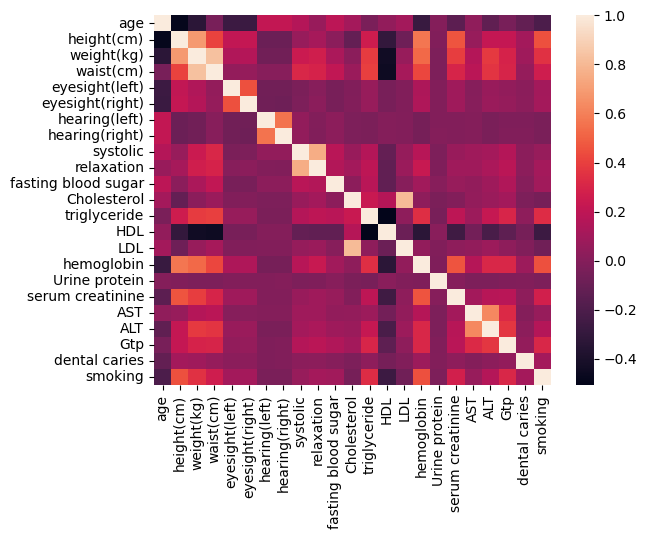

In [44]:
# df_train['age'].hist(bins=30)

cor = df.drop(columns=['id']).corr()
sns.heatmap(cor)

Based on the provided data, the following column pairs have the highest correlation (by the absolute value of the correlation coefficient). Here are some of the most correlated pairs:

1. **Strong positive correlation:**
   - **"waist(cm)" and "weight(kg)"**: \( r = 0.830 \)
   - **"systolic" and "relaxation"**: \( r = 0.753 \)
   - **"eyesight(left)" and "eyesight(right)"**: \( r = 0.449 \)
   - **"height(cm)" and "weight(kg)"**: \( r = 0.687 \)
   - **"HDL" and "triglyceride"**: \( r = -0.508 \) (negative correlation)
   - **"ALT" and "AST"**: \( r = 0.623 \)

2. **Strong correlation among metabolic indicators:**
   - **"LDL" and "Cholesterol"**: \( r = 0.809 \)
   - **"hemoglobin" and "height(cm)"**: \( r = 0.569 \)
   - **"smoking" and "height(cm)"**: \( r = 0.447 \)
   - **"ALT" and "Gtp"**: \( r = 0.370 \)

These results demonstrate that metabolic parameters (e.g., "waist", "weight", "LDL", "Cholesterol") are closely interrelated, as are physical characteristics such as height, weight, and hemoglobin levels.

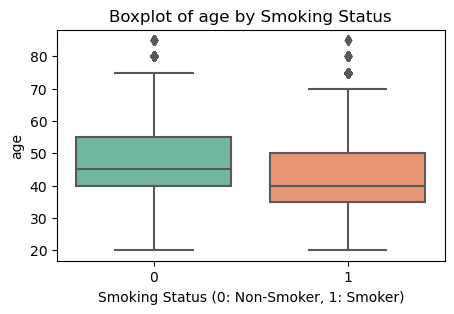

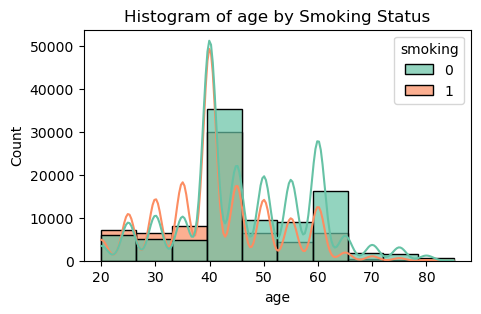

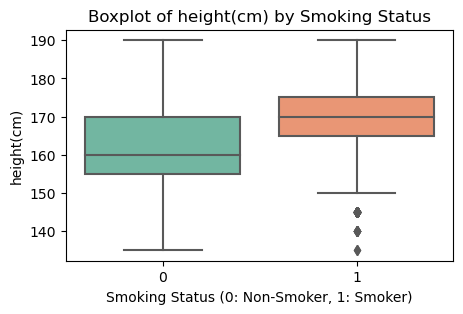

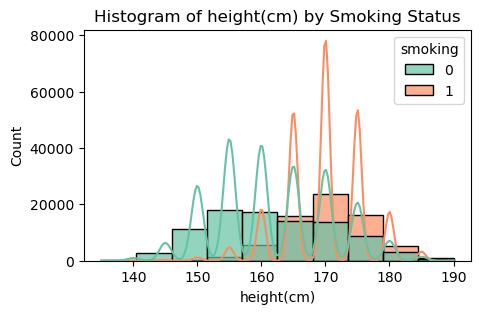

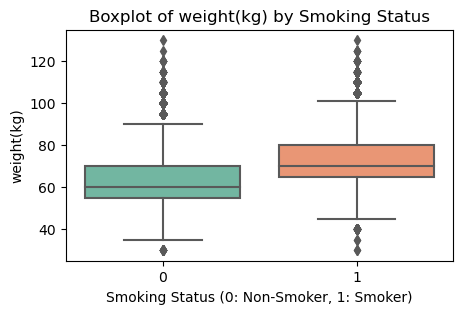

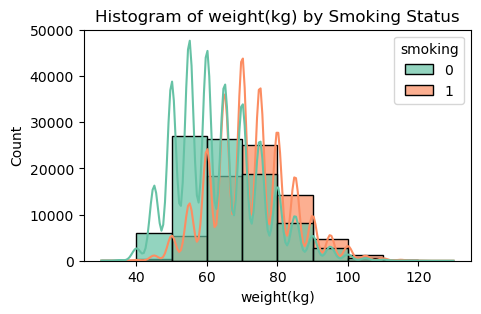

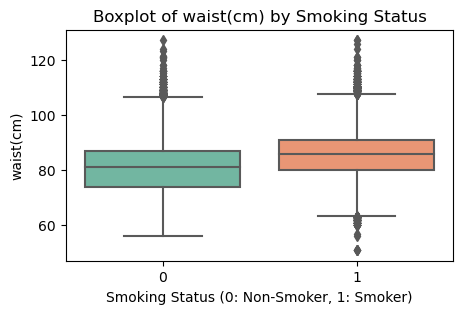

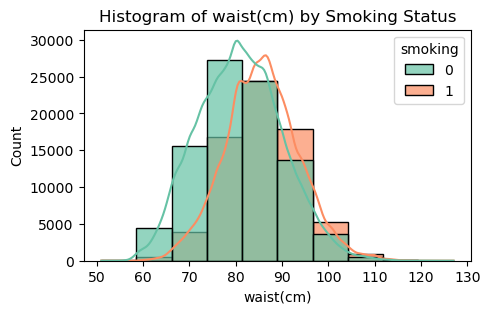

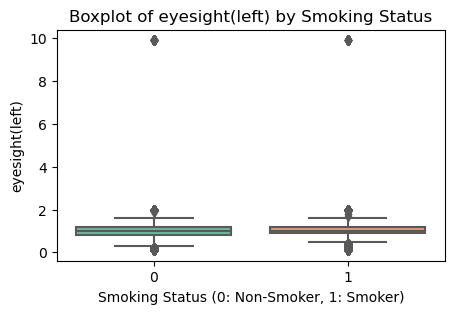

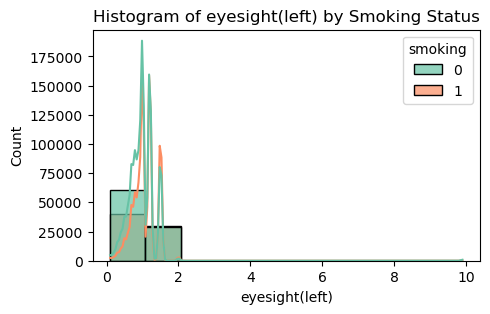

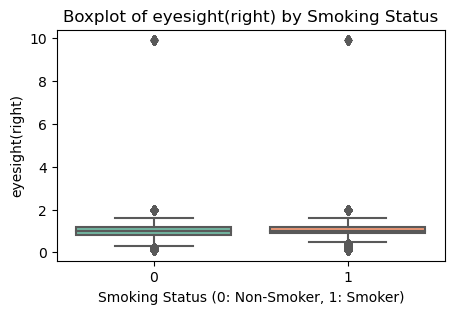

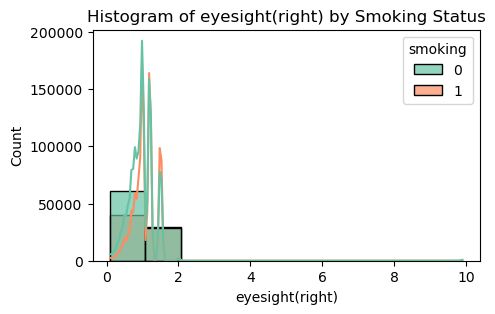

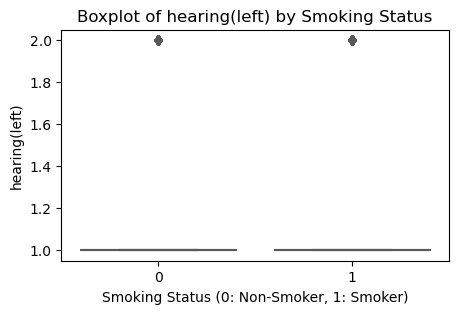

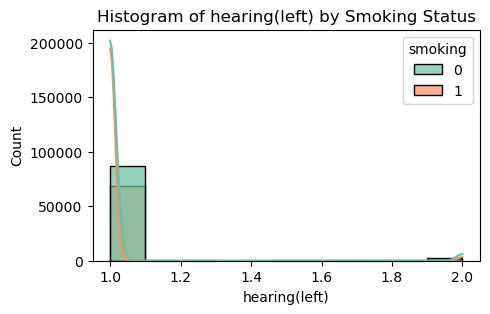

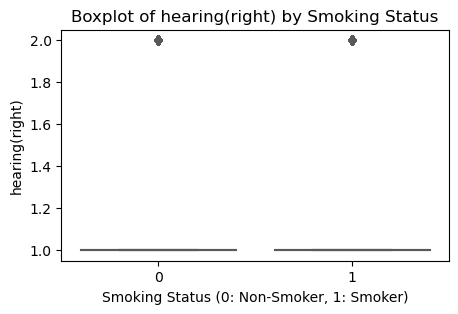

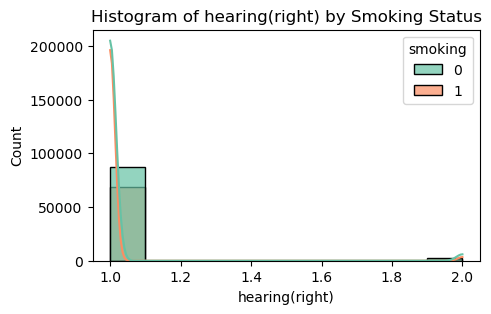

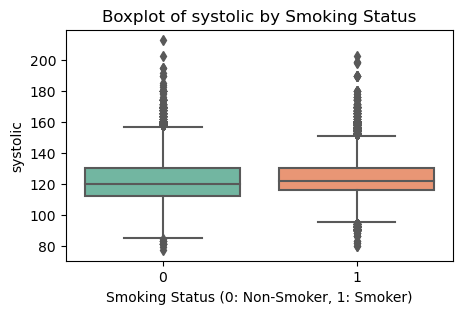

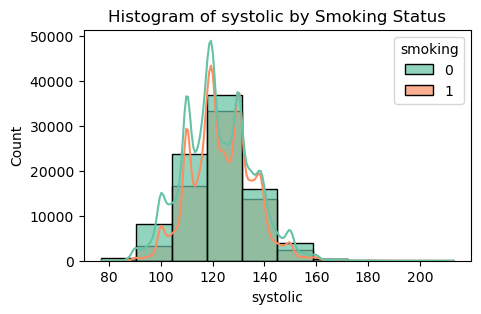

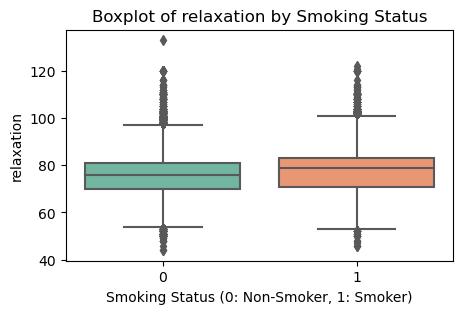

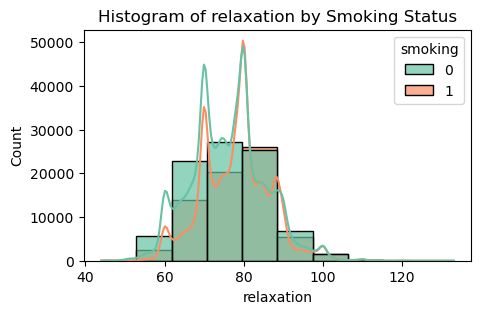

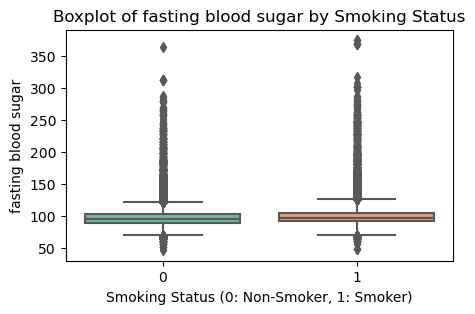

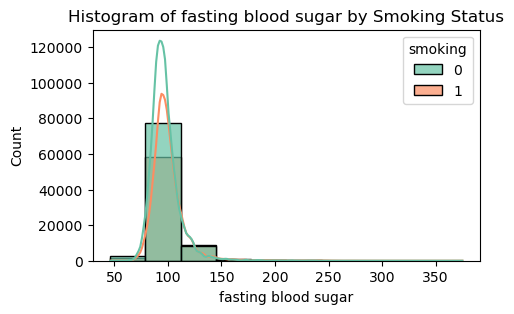

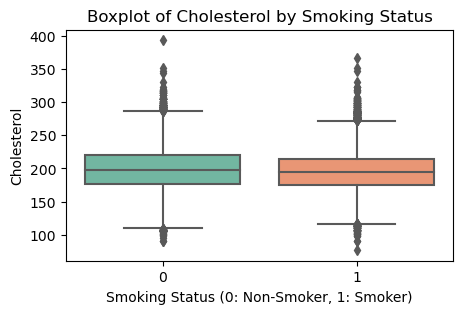

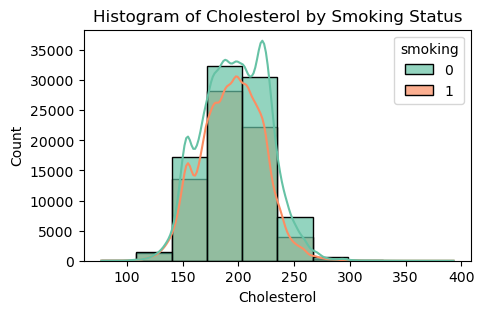

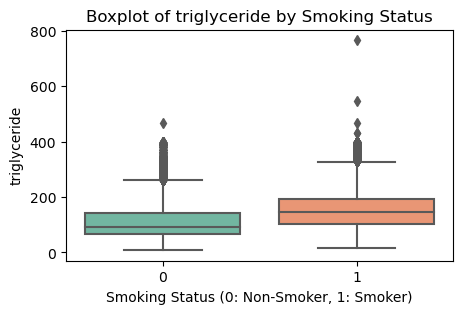

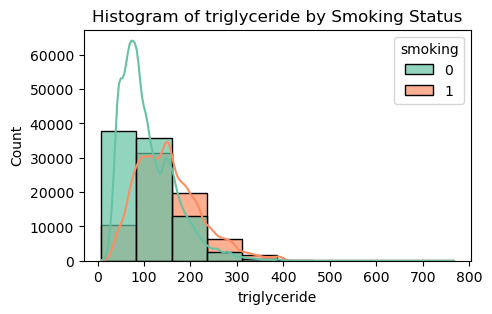

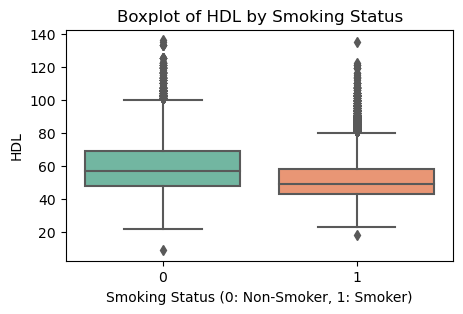

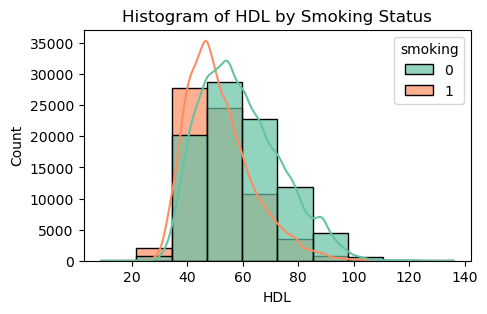

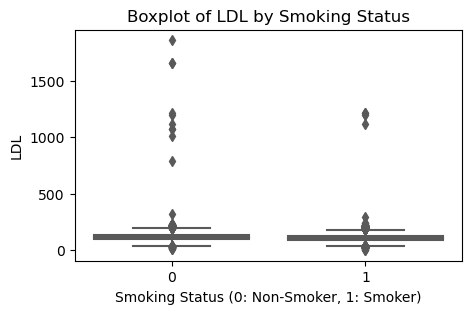

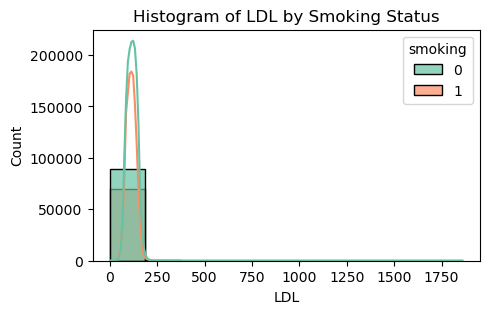

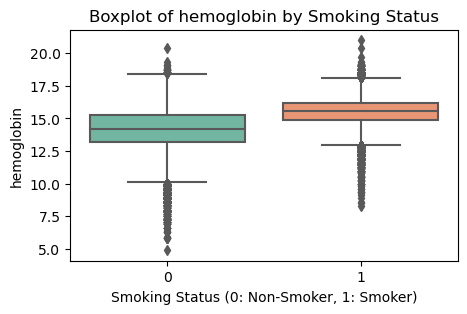

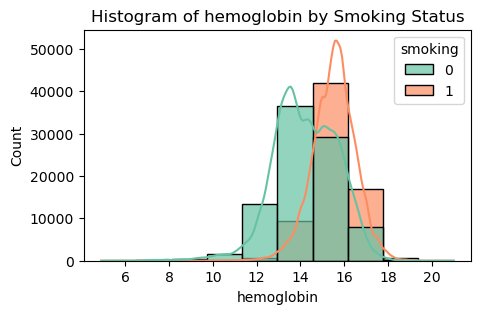

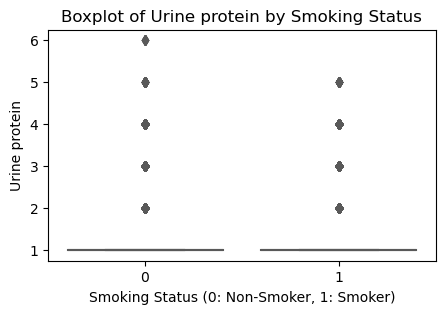

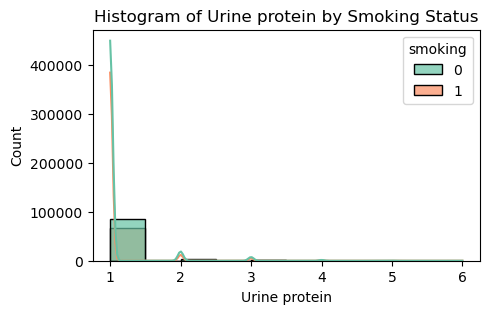

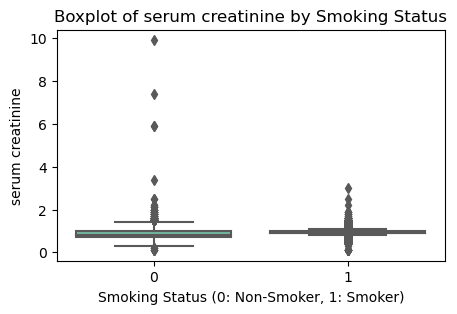

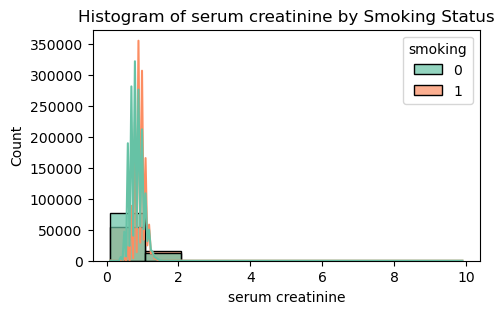

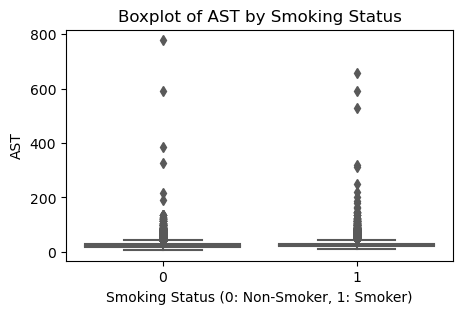

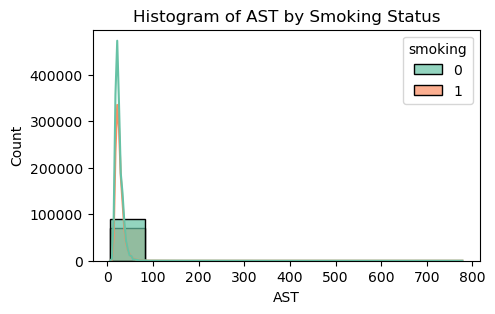

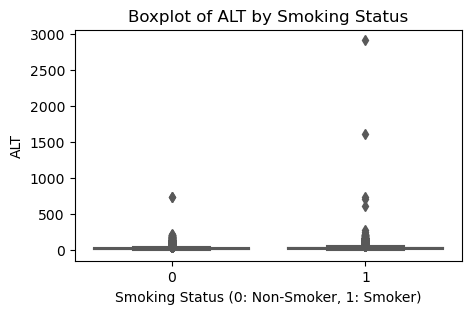

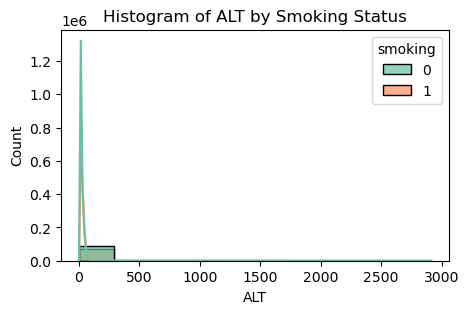

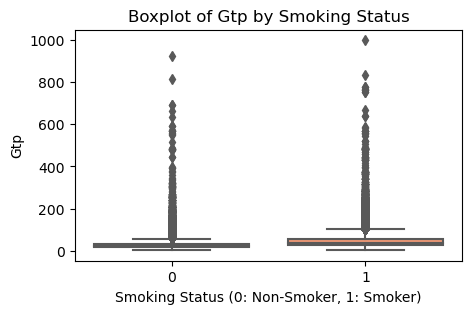

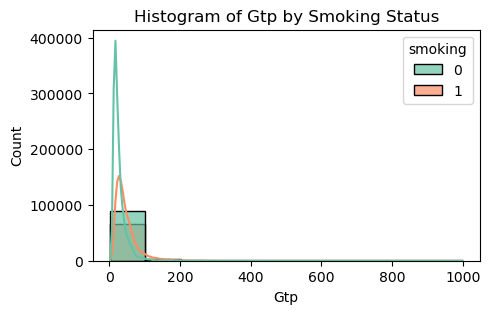

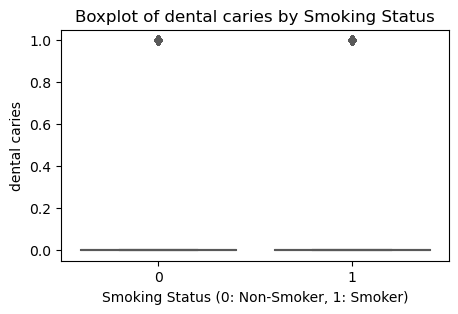

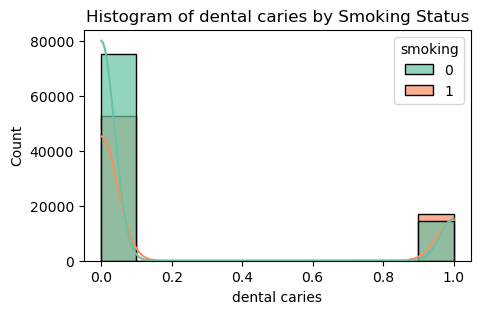

In [56]:
figsize = (5, 3)

for feature in features:
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x="smoking", y=feature, palette="Set2")
    plt.title(f'Boxplot of {feature} by Smoking Status')
    plt.xlabel("Smoking Status (0: Non-Smoker, 1: Smoker)")
    plt.ylabel(feature)
    plt.show()
    
    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=feature, hue="smoking", kde=True, palette="Set2", bins=10, alpha=0.7)
    plt.title(f'Histogram of {feature} by Smoking Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [29]:
# df['hemoglobin']

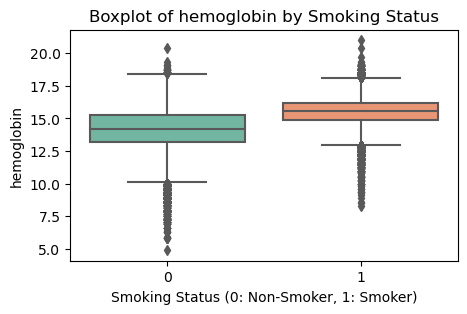

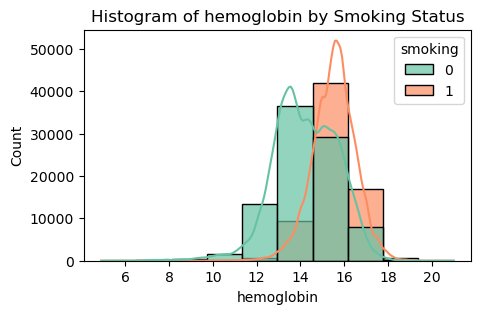

In [30]:
feature = 'hemoglobin'
figsize = (5, 3)

plt.figure(figsize=figsize)
sns.boxplot(data=df, x="smoking", y=feature, palette="Set2")
plt.title(f'Boxplot of {feature} by Smoking Status')
plt.xlabel("Smoking Status (0: Non-Smoker, 1: Smoker)")
plt.ylabel(feature)
plt.show()

plt.figure(figsize=figsize)
sns.histplot(data=df, x=feature, hue="smoking", kde=True, palette="Set2", bins=10, alpha=0.7)
plt.title(f'Histogram of {feature} by Smoking Status')
plt.xlabel(feature)
plt.ylabel('Count')
plt.show()

## Metric

For evaluating the quality of a binary classification model for identifying smokers, the ROC AUC (Receiver Operating Characteristic Area Under Curve) metric is preferred because it considers the balance between sensitivity (True Positive Rate) and specificity (True Negative Rate). In tasks with potential class imbalance, such as smokers versus non-smokers, ROC AUC is independent of the specific decision threshold, allowing for an assessment of the model's overall ability to distinguish between classes across the full range of probabilities. This is particularly important if the costs of different types of errors (false positives or false negatives) vary, for example, in cases where misclassifying smokers could necessitate preventive measures. Thus, ROC AUC provides an objective and universal way to compare models, regardless of the chosen threshold.

It is also worth taking into account that the original competition, from which the dataset was taken, used exactly the ROC AUC metric for the final comparison of the models' performance quality. Therefore, it is convenient to use this metric

## Binning
If the attribute takes only two values, we convert it into a Boolean form at once.
If not, we divide it into 10 equal parts using pd.cut and use the obtained boundaries for sequential binning.

In [102]:
for col in features:
    
    if df[col].nunique() == 2:
        print(col, 'simple binarising')
        u = df[col].unique()[1]
        result = df[col] == u
        df[col] = result
    else:
        quantiles = pd.cut(df[col], bins=10, retbins=True)[1]
        quantiles = sorted(set(quantiles))
        print(col, 'binarising to 10 columns, boundaries:', quantiles)
        print()

        for q in quantiles:
            if q != quantiles[0]: 
                df[f'{col}>{q:.0f}'] = df[col] > q

        df = df.drop(columns=[col])
        
        
list(df.columns)

age binarising to 10 columns, boundaries: [19.935, 26.5, 33.0, 39.5, 46.0, 52.5, 59.0, 65.5, 72.0, 78.5, 85.0]

height(cm) binarising to 10 columns, boundaries: [134.945, 140.5, 146.0, 151.5, 157.0, 162.5, 168.0, 173.5, 179.0, 184.5, 190.0]

weight(kg) binarising to 10 columns, boundaries: [29.9, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0]

waist(cm) binarising to 10 columns, boundaries: [50.924, 58.6, 66.2, 73.8, 81.4, 89.0, 96.6, 104.19999999999999, 111.8, 119.39999999999999, 127.0]

eyesight(left) binarising to 10 columns, boundaries: [0.0902, 1.08, 2.06, 3.0400000000000005, 4.0200000000000005, 5.0, 5.98, 6.96, 7.94, 8.92, 9.9]

eyesight(right) binarising to 10 columns, boundaries: [0.0902, 1.08, 2.06, 3.0400000000000005, 4.0200000000000005, 5.0, 5.98, 6.96, 7.94, 8.92, 9.9]

hearing(left) simple binarising
hearing(right) simple binarising
systolic binarising to 10 columns, boundaries: [76.864, 90.6, 104.2, 117.8, 131.4, 145.0, 158.6, 172.2, 185.8, 199.3999999999

['id',
 'hearing(left)',
 'hearing(right)',
 'dental caries',
 'smoking',
 'age>26',
 'age>33',
 'age>40',
 'age>46',
 'age>52',
 'age>59',
 'age>66',
 'age>72',
 'age>78',
 'age>85',
 'height(cm)>140',
 'height(cm)>146',
 'height(cm)>152',
 'height(cm)>157',
 'height(cm)>162',
 'height(cm)>168',
 'height(cm)>174',
 'height(cm)>179',
 'height(cm)>184',
 'height(cm)>190',
 'weight(kg)>40',
 'weight(kg)>50',
 'weight(kg)>60',
 'weight(kg)>70',
 'weight(kg)>80',
 'weight(kg)>90',
 'weight(kg)>100',
 'weight(kg)>110',
 'weight(kg)>120',
 'weight(kg)>130',
 'waist(cm)>59',
 'waist(cm)>66',
 'waist(cm)>74',
 'waist(cm)>81',
 'waist(cm)>89',
 'waist(cm)>97',
 'waist(cm)>104',
 'waist(cm)>112',
 'waist(cm)>119',
 'waist(cm)>127',
 'eyesight(left)>1',
 'eyesight(left)>2',
 'eyesight(left)>3',
 'eyesight(left)>4',
 'eyesight(left)>5',
 'eyesight(left)>6',
 'eyesight(left)>7',
 'eyesight(left)>8',
 'eyesight(left)>9',
 'eyesight(left)>10',
 'eyesight(right)>1',
 'eyesight(right)>2',
 'eyesight(ri

In [103]:
df.head(1)

,id,hearing(left),hearing(right),dental caries,smoking,age>26,age>33,age>40,age>46,age>52,age>59,age>66,age>72,age>78,age>85,height(cm)>140,height(cm)>146,height(cm)>152,height(cm)>157,height(cm)>162,height(cm)>168,height(cm)>174,height(cm)>179,height(cm)>184,height(cm)>190,...,AST>469,AST>546,AST>624,AST>701,AST>778,ALT>292,ALT>584,ALT>875,ALT>1166,ALT>1458,ALT>1749,ALT>2040,ALT>2331,ALT>2623,ALT>2914,Gtp>102,Gtp>201,Gtp>301,Gtp>401,Gtp>500,Gtp>600,Gtp>700,Gtp>800,Gtp>899,Gtp>999
0,0,False,False,False,1,True,True,True,True,True,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
